In [1]:
import sys, os

import numpy as np
# Note that the path ./Albedo_project/data_processing is now in the path
import xarray as xr
from cloudpathlib import AnyPath
import matplotlib.pyplot as plt
from datetime import date

# Local Imports
curdir = os.getcwd()
print(curdir+"../data_processing")
sys.path.insert(0, curdir+"/../data_processing")
sys.path.insert(0, curdir+"/../visualization")
import ceres_ebaf
import ceres_ebaf_plotting

fig_path = AnyPath("../../Figs")
current_month_folder="23Aug"
base_path = AnyPath("/Users/mawa7160/dev/data/CERES/EBAF/")

color_v0 = "orange"
color_v1 = "black"
color_v2 = "cyan"

color_global = "red"
color_nh = "green"
color_sh = "blue"

/Users/mawa7160/Library/CloudStorage/OneDrive-UCB-O365/Documents/GitHub/Hemispheric-Albedo-Project/Albedo_project/Notebooks../data_processing


In [2]:
ebaf_4_2_file_path = base_path / current_month_folder / "CERES_EBAF-TOA_Ed4.2_Subset_200003-202305.nc"
ebaf_4_2_full_years = xr.open_dataset(ebaf_4_2_file_path)

In [23]:
solar_yearly_v2 = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=2, end_yr="2023")
solar_yearly_v1 = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=1, end_yr="2023")
solar_yearly_v0 = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=0, end_yr="2023")

solar_yearly_v2_12_mon_run = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=2, end_yr="2023", running_length=12)
solar_yearly_v1_12_mon_run = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=1, end_yr="2023", running_length=12)
solar_yearly_v0_12_mon_run = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=0, end_yr="2023", running_length=12)

solar_yearly_v2_48_mon_run = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=2, end_yr="2023", running_length=48)
solar_yearly_v1_48_mon_run = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=1, end_yr="2023", running_length=48)
solar_yearly_v0_48_mon_run = ceres_ebaf.create_hemisphere_data(ebaf_4_2_full_years["solar_mon"], time_weighting=0, end_yr="2023", running_length=48)

In [24]:
years_date_time = []
for year in solar_yearly_v2.year.values:
    years_date_time.append(date(year, 1, 1))

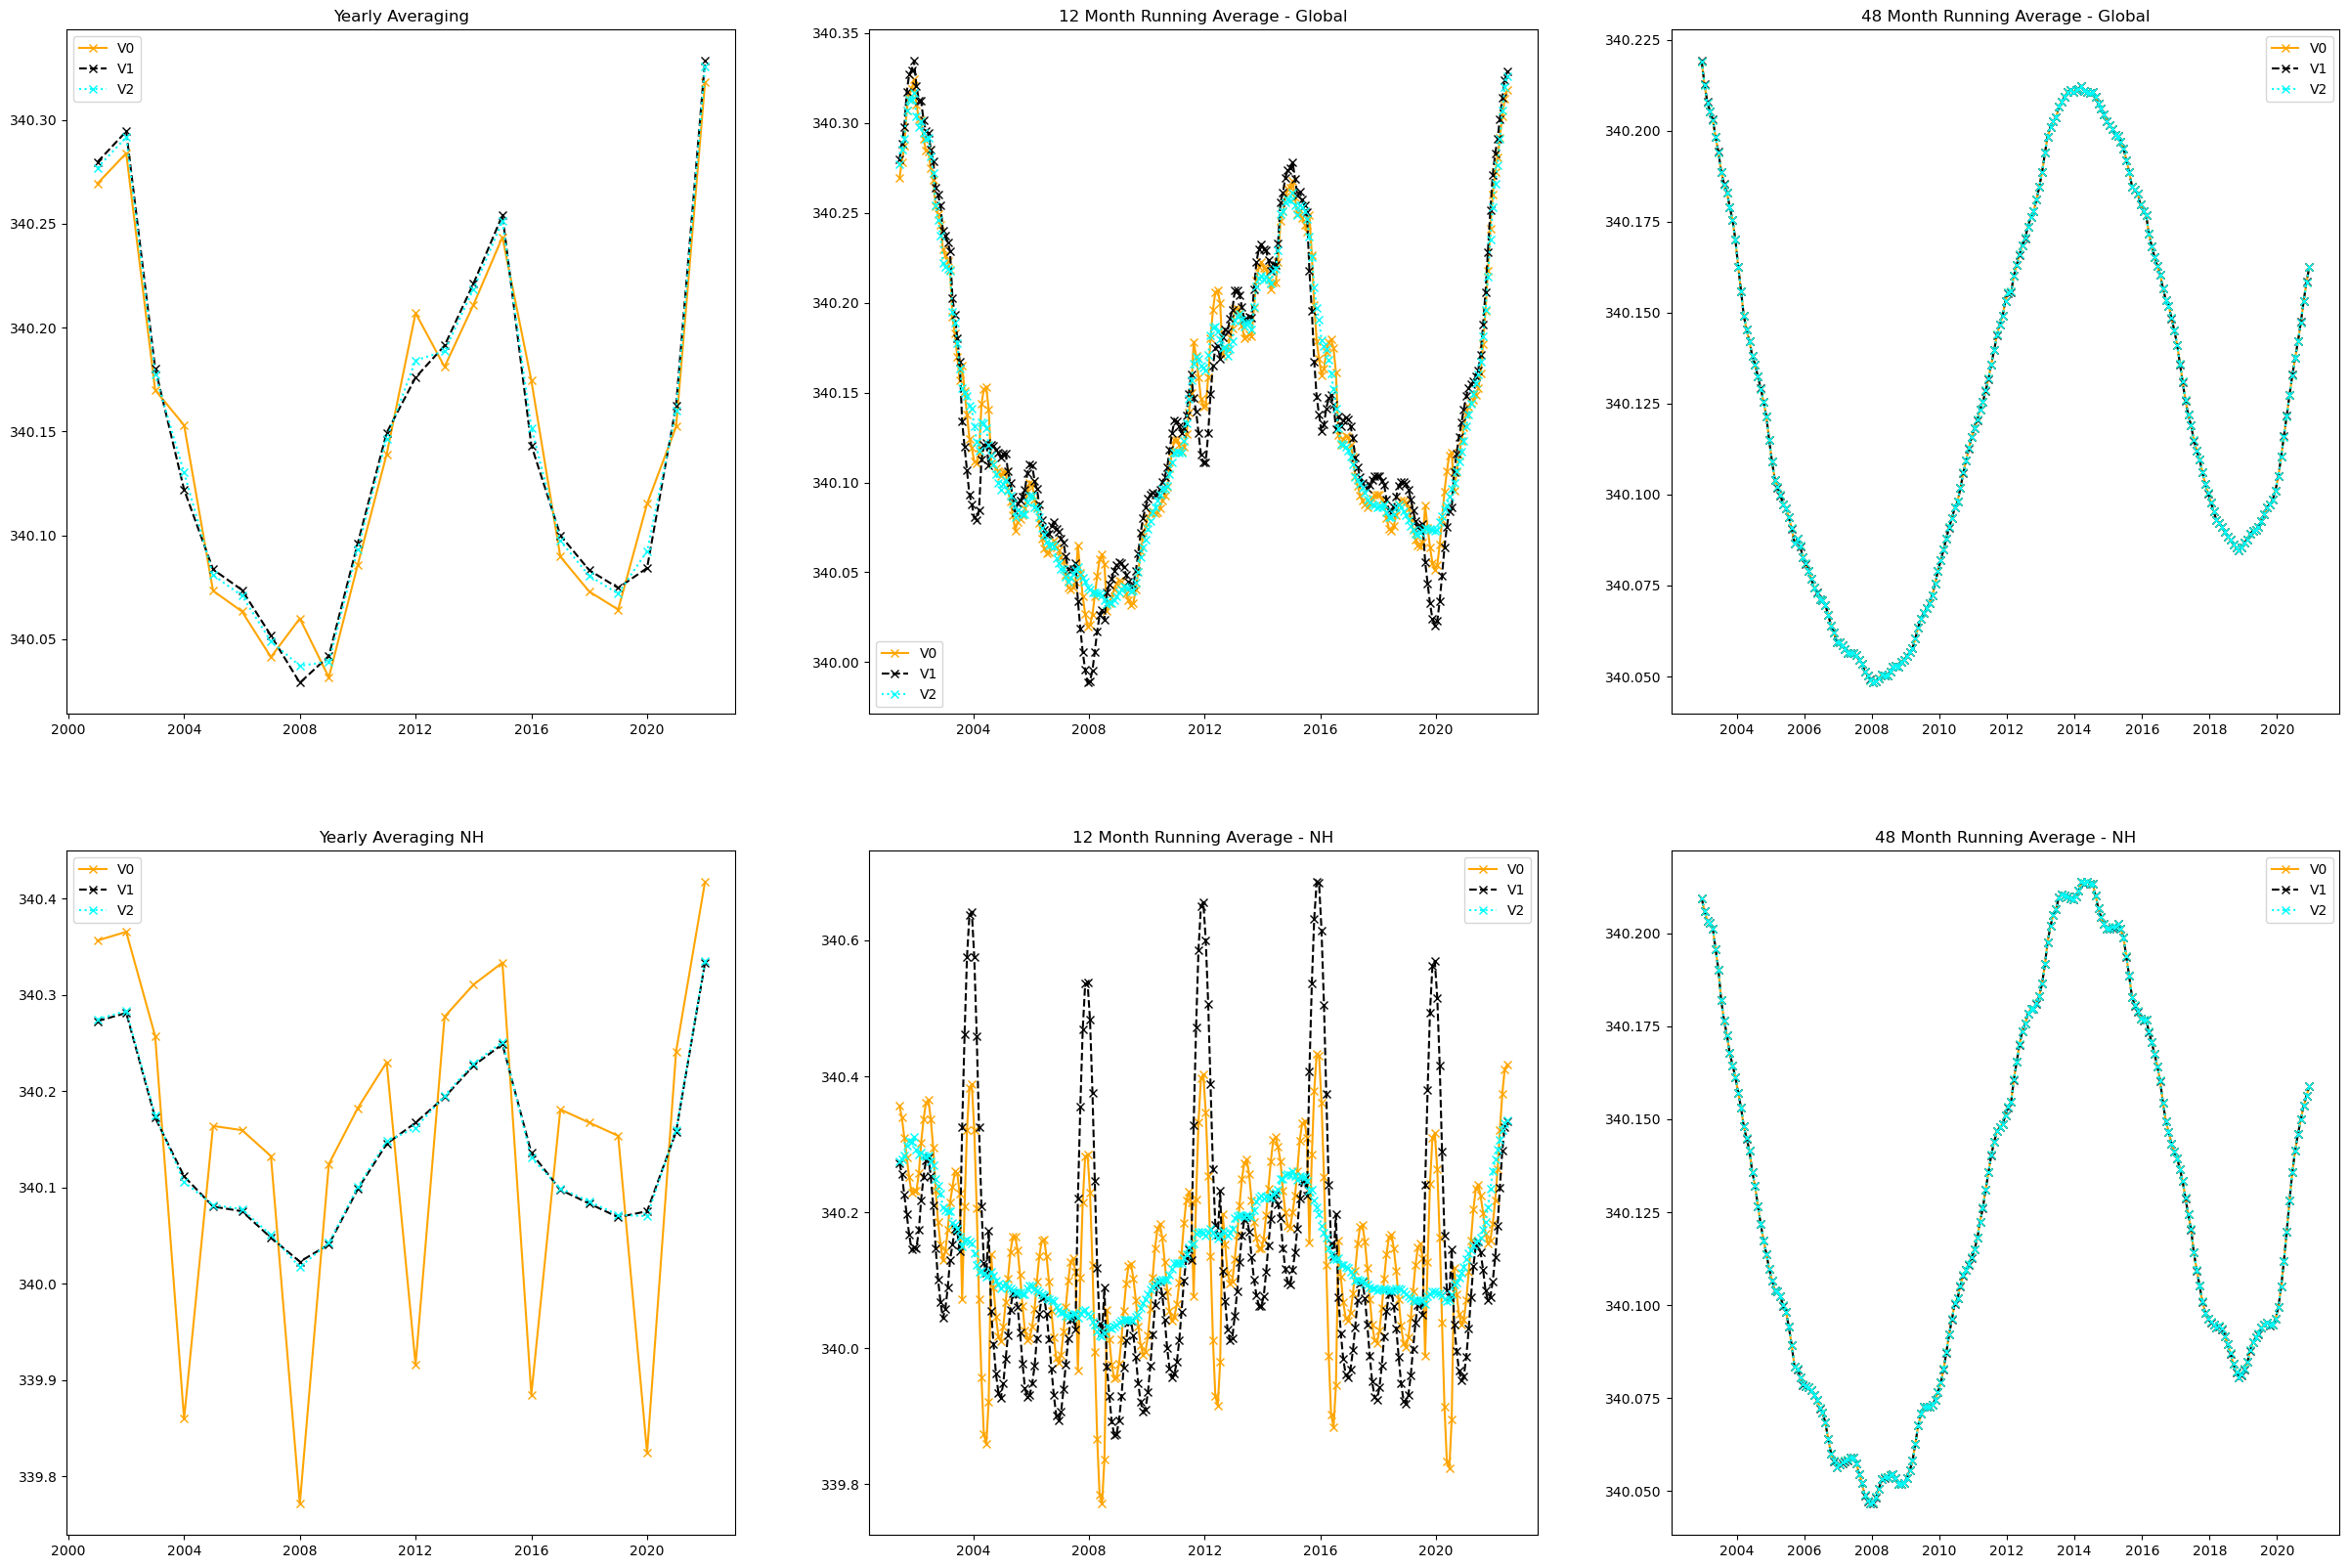

In [26]:
fig, axis = plt.subplots(2, 3, figsize=(30,20))

axis[0,0].plot(years_date_time, solar_yearly_v0["global"], "-x", color=color_v0, label='V0')
axis[0,0].plot(years_date_time, solar_yearly_v1["global"], "--x", color=color_v1, label='V1')
axis[0,0].plot(years_date_time, solar_yearly_v2["global"], ":x", color=color_v2, label='V2')
axis[0,0].legend()
axis[0,0].set_title("Yearly Averaging")

axis[0,1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v0_12_mon_run["global"], "-x", color=color_v0, label='V0')
axis[0,1].plot(solar_yearly_v1_12_mon_run.time, solar_yearly_v1_12_mon_run["global"], "--x", color=color_v1, label='V1')
axis[0,1].plot(solar_yearly_v2_12_mon_run.time, solar_yearly_v2_12_mon_run["global"], ":x", color=color_v2, label='V2')
axis[0,1].set_title("12 Month Running Average - Global")
axis[0,1].legend()

axis[0,2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v0_48_mon_run["global"], "-x", color=color_v0, label='V0')
axis[0,2].plot(solar_yearly_v1_48_mon_run.time, solar_yearly_v1_48_mon_run["global"], "--x", color=color_v1, label='V1')
axis[0,2].plot(solar_yearly_v2_48_mon_run.time, solar_yearly_v2_48_mon_run["global"], ":x", color=color_v2, label='V2')
axis[0,2].set_title("48 Month Running Average - Global")
axis[0,2].legend()

axis[1,0].plot(years_date_time, solar_yearly_v0["nh"], "-x", color=color_v0, label='V0')
axis[1,0].plot(years_date_time, solar_yearly_v1["nh"], "--x", color=color_v1, label='V1')
axis[1,0].plot(years_date_time, solar_yearly_v2["nh"], ":x", color=color_v2, label='V2')
axis[1,0].legend()
axis[1,0].set_title("Yearly Averaging NH")

axis[1,1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v0_12_mon_run["nh"], "-x", color=color_v0, label='V0')
axis[1,1].plot(solar_yearly_v1_12_mon_run.time, solar_yearly_v1_12_mon_run["nh"], "--x", color=color_v1, label='V1')
axis[1,1].plot(solar_yearly_v2_12_mon_run.time, solar_yearly_v2_12_mon_run["nh"], ":x", color=color_v2, label='V2')
axis[1,1].set_title("12 Month Running Average - NH")
axis[1,1].legend()

axis[1,2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v0_48_mon_run["nh"], "-x", color=color_v0, label='V0')
axis[1,2].plot(solar_yearly_v1_48_mon_run.time, solar_yearly_v1_48_mon_run["nh"], "--x", color=color_v1, label='V1')
axis[1,2].plot(solar_yearly_v2_48_mon_run.time, solar_yearly_v2_48_mon_run["nh"], ":x", color=color_v2, label='V2')
axis[1,2].set_title("48 Month Running Average - NH")
axis[1,2].legend()

Text(0.5, 1.0, '48 Month Running Averaging')

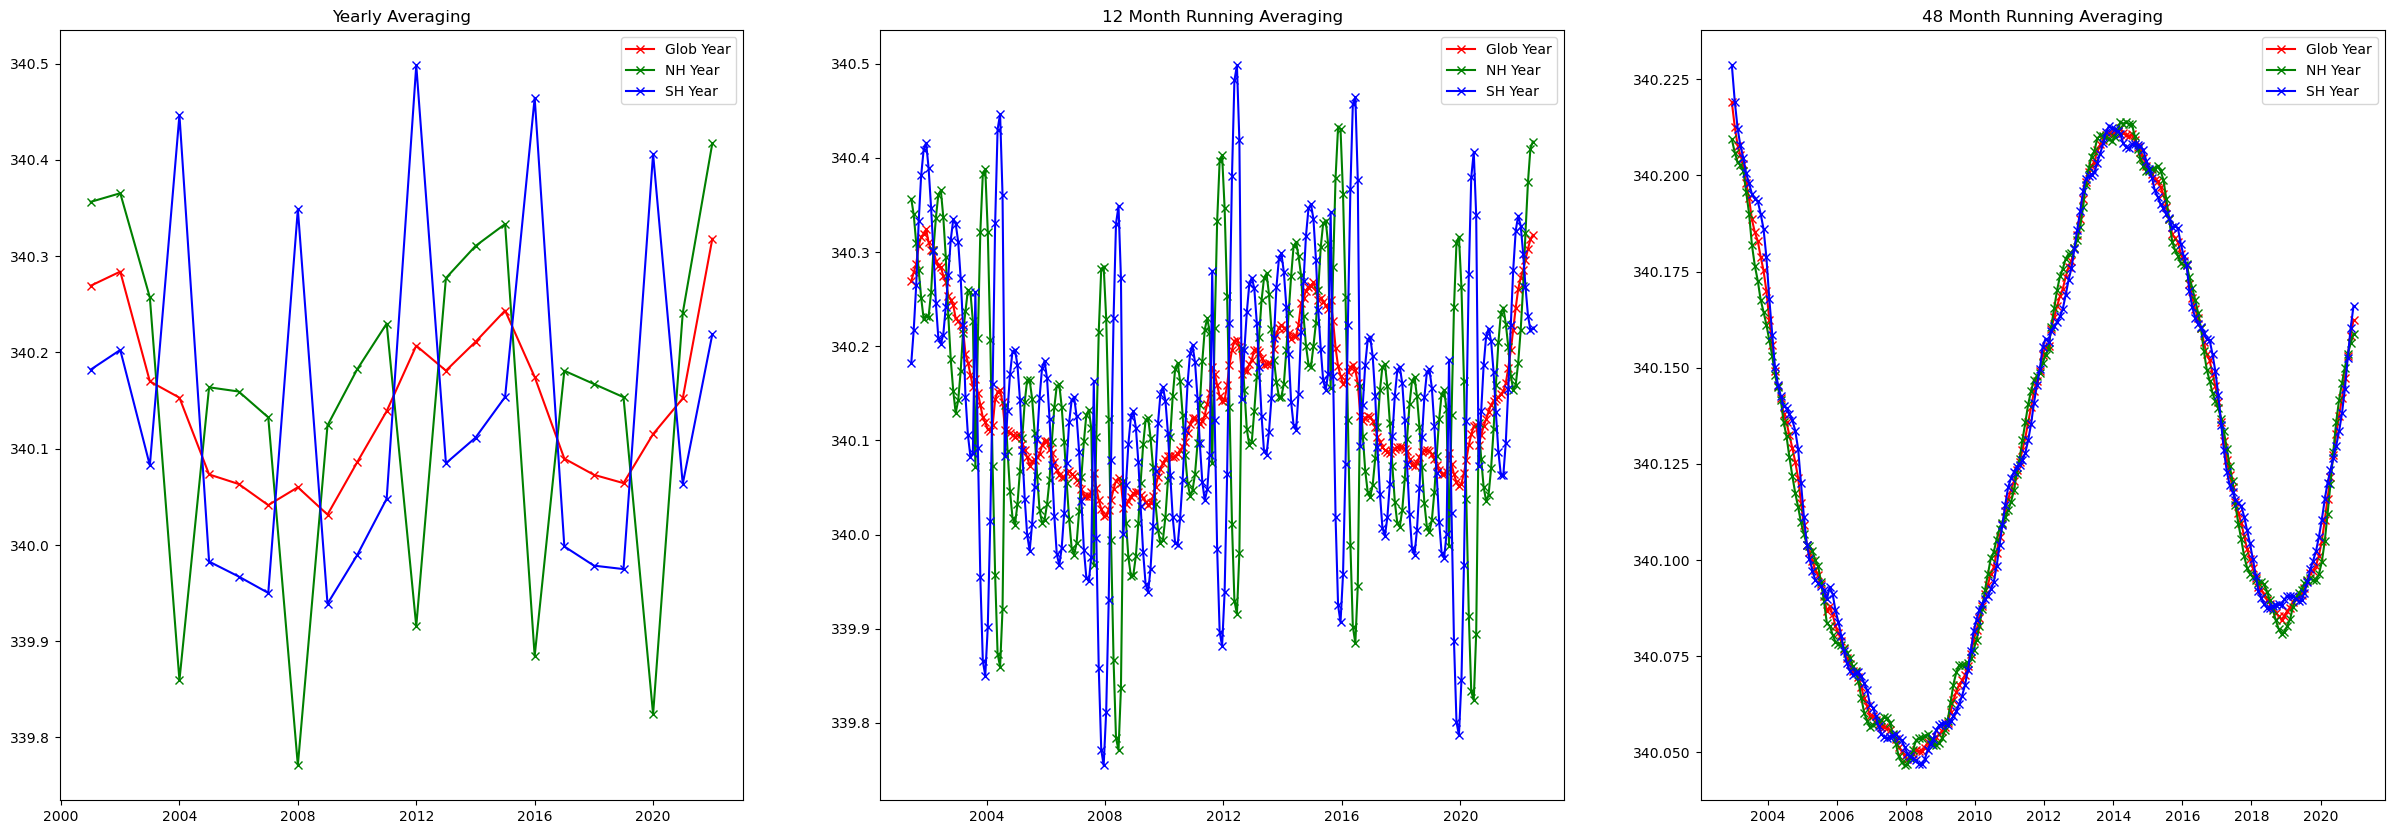

In [28]:
fig, axis = plt.subplots(1, 3, figsize=(30,10))

axis[0].plot(years_date_time, solar_yearly_v0["global"], "-x", color=color_global, label='Glob Year')
axis[0].plot(years_date_time, solar_yearly_v0["nh"], "-x", color=color_nh, label='NH Year')
axis[0].plot(years_date_time, solar_yearly_v0["sh"], "-x", color=color_sh, label='SH Year')
axis[0].legend()
axis[0].set_title("Yearly Averaging")

axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v0_12_mon_run["global"], "-x", color=color_global, label='Glob Year')
axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v0_12_mon_run["nh"], "-x", color=color_nh, label='NH Year')
axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v0_12_mon_run["sh"], "-x", color=color_sh, label='SH Year')
axis[1].legend()
axis[1].set_title("12 Month Running Averaging")

axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v0_48_mon_run["global"], "-x", color=color_global, label='Glob Year')
axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v0_48_mon_run["nh"], "-x", color=color_nh, label='NH Year')
axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v0_48_mon_run["sh"], "-x", color=color_sh, label='SH Year')
axis[2].legend()
axis[2].set_title("48 Month Running Averaging")

Text(0.5, 1.0, '48 Month Running Averaging')

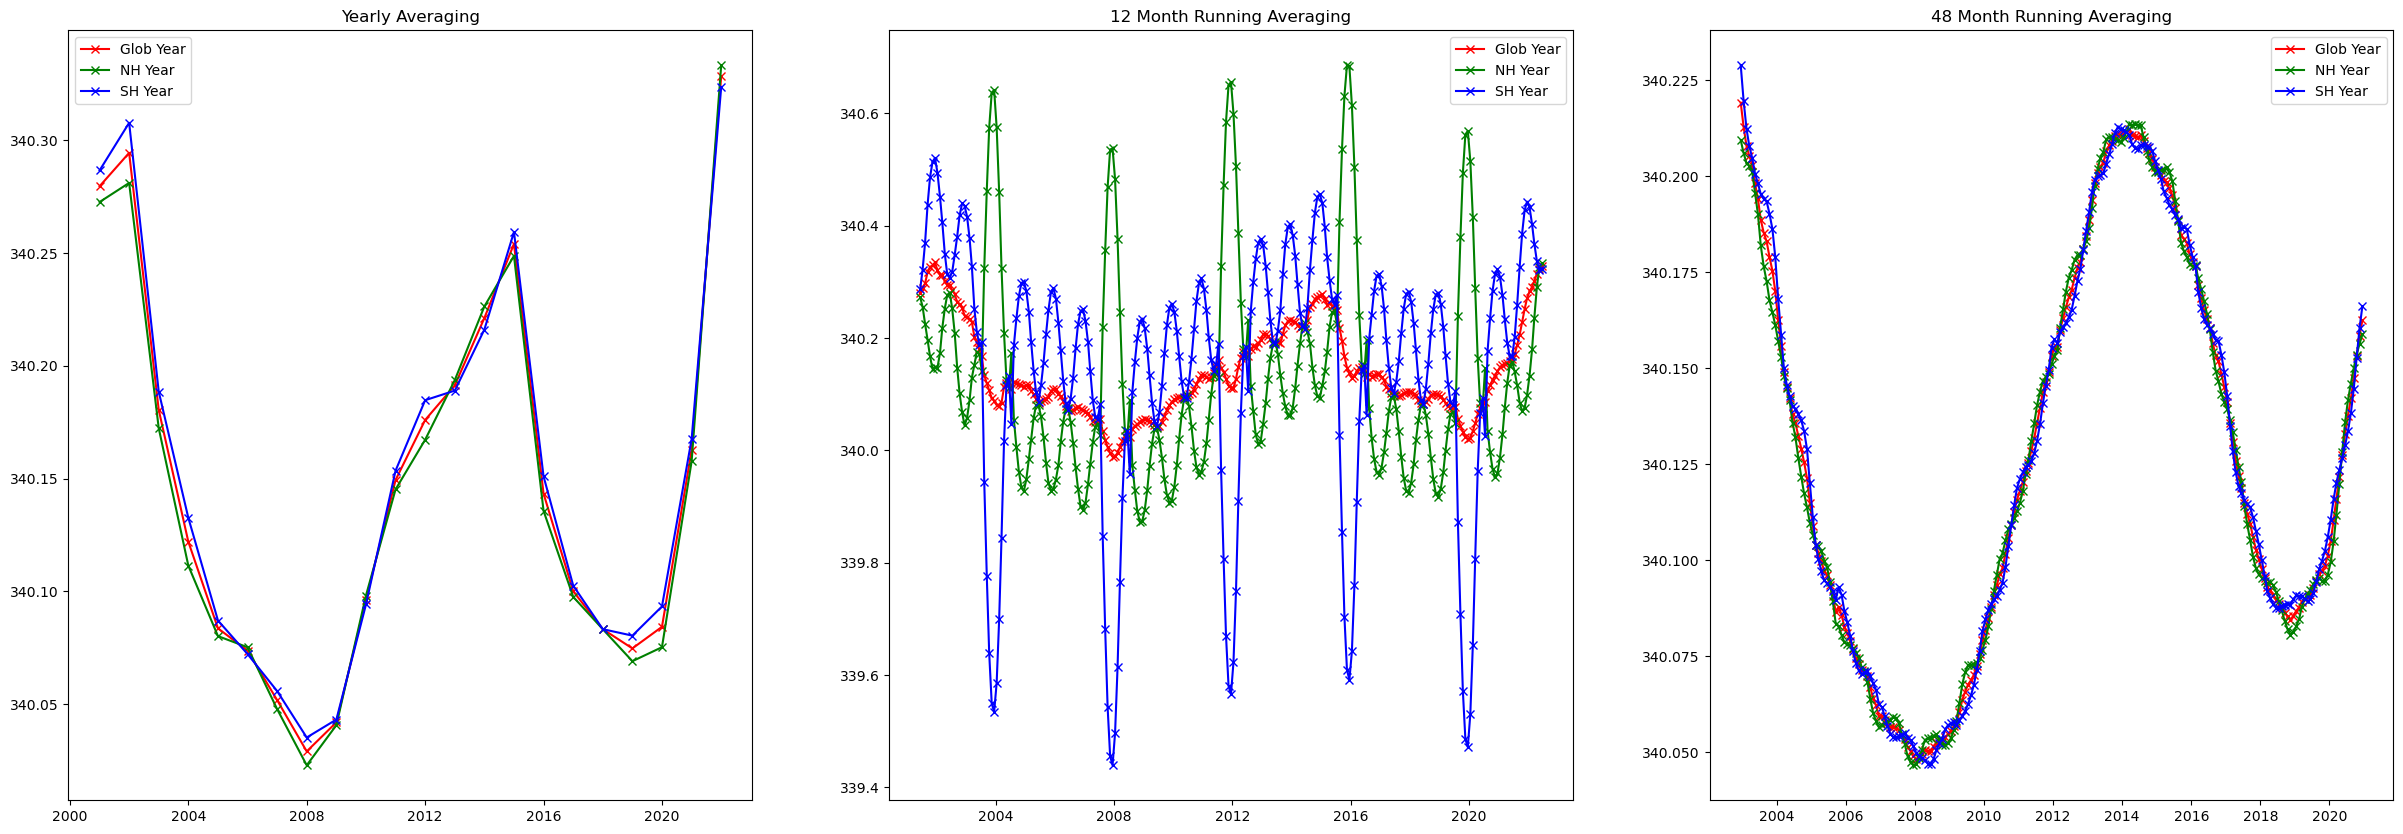

In [29]:
fig, axis = plt.subplots(1, 3, figsize=(30,10))

axis[0].plot(years_date_time, solar_yearly_v1["global"], "-x", color=color_global, label='Glob Year')
axis[0].plot(years_date_time, solar_yearly_v1["nh"], "-x", color=color_nh, label='NH Year')
axis[0].plot(years_date_time, solar_yearly_v1["sh"], "-x", color=color_sh, label='SH Year')
axis[0].legend()
axis[0].set_title("Yearly Averaging")

axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v1_12_mon_run["global"], "-x", color=color_global, label='Glob Year')
axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v1_12_mon_run["nh"], "-x", color=color_nh, label='NH Year')
axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v1_12_mon_run["sh"], "-x", color=color_sh, label='SH Year')
axis[1].legend()
axis[1].set_title("12 Month Running Averaging")

axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v1_48_mon_run["global"], "-x", color=color_global, label='Glob Year')
axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v1_48_mon_run["nh"], "-x", color=color_nh, label='NH Year')
axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v1_48_mon_run["sh"], "-x", color=color_sh, label='SH Year')
axis[2].legend()
axis[2].set_title("48 Month Running Averaging")

Text(0.5, 1.0, '48 Month Running Averaging')

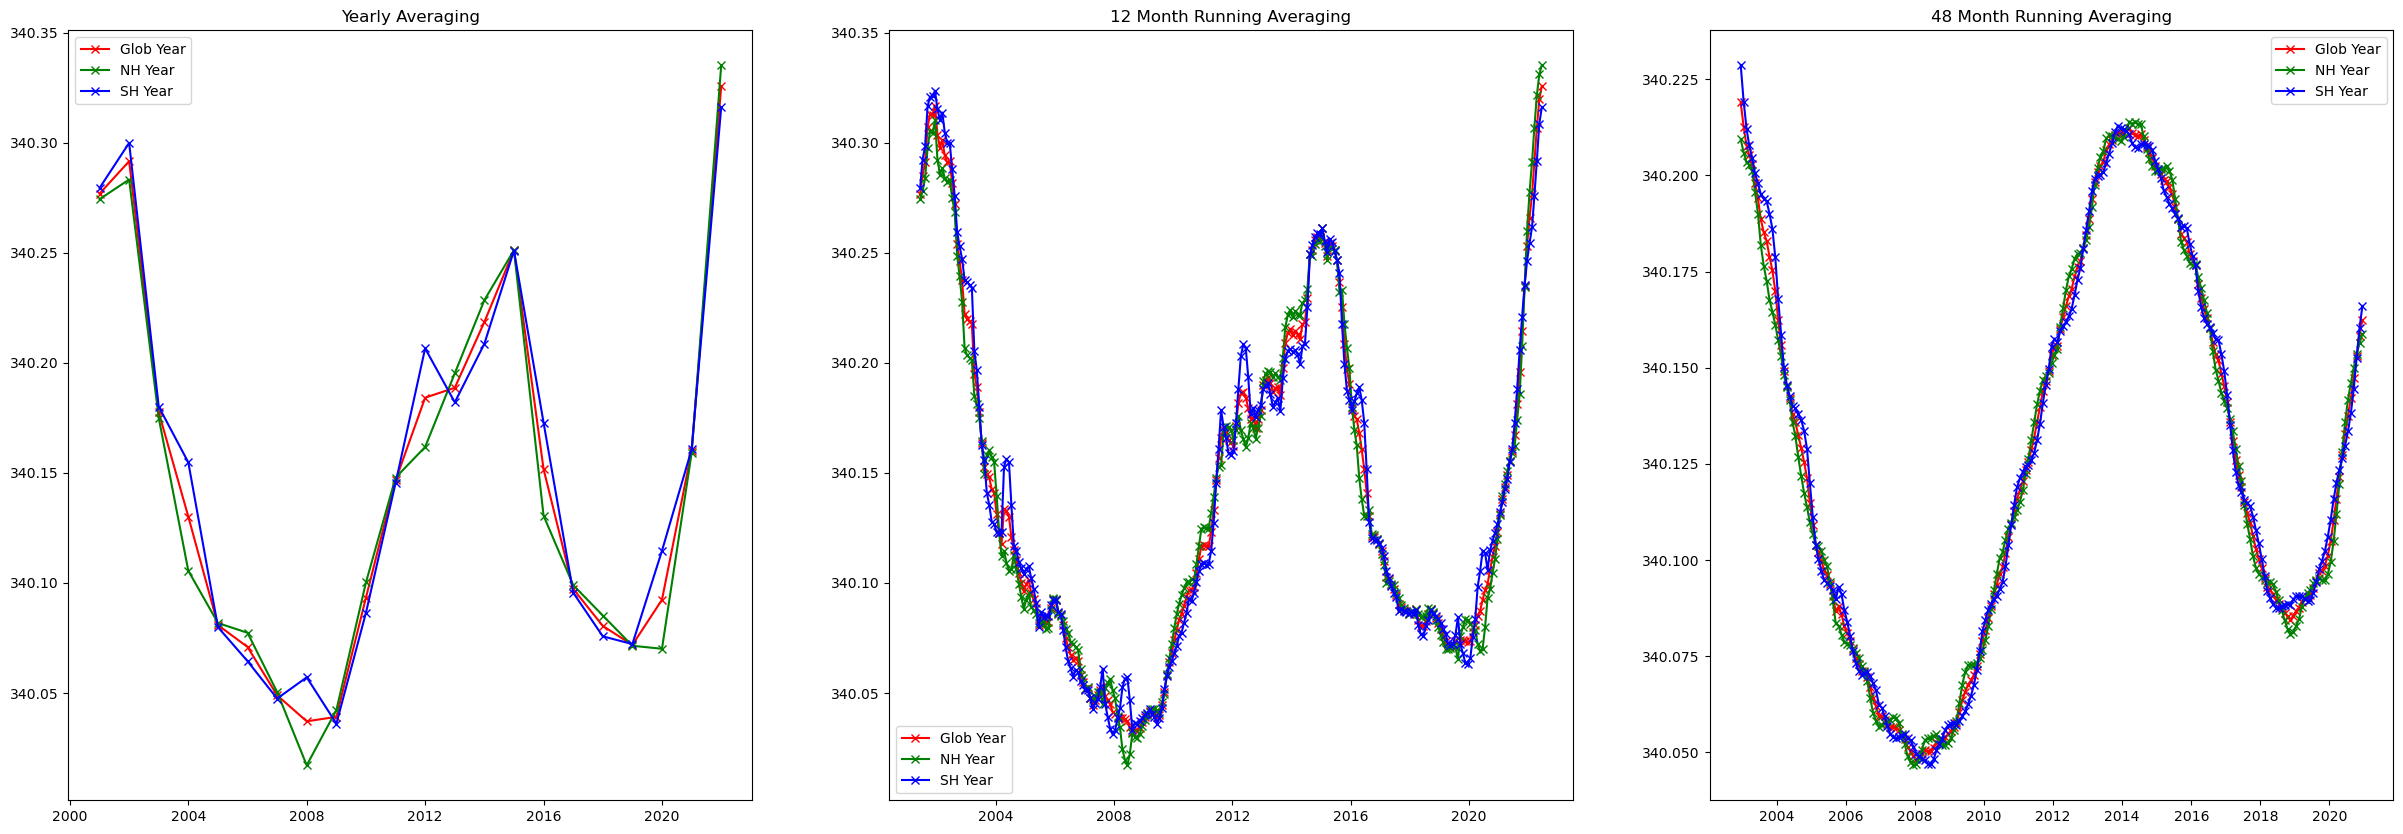

In [30]:
fig, axis = plt.subplots(1, 3, figsize=(30,10))

axis[0].plot(years_date_time, solar_yearly_v2["global"], "-x", color=color_global, label='Glob Year')
axis[0].plot(years_date_time, solar_yearly_v2["nh"], "-x", color=color_nh, label='NH Year')
axis[0].plot(years_date_time, solar_yearly_v2["sh"], "-x", color=color_sh, label='SH Year')
axis[0].legend()
axis[0].set_title("Yearly Averaging")

axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v2_12_mon_run["global"], "-x", color=color_global, label='Glob Year')
axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v2_12_mon_run["nh"], "-x", color=color_nh, label='NH Year')
axis[1].plot(solar_yearly_v0_12_mon_run.time, solar_yearly_v2_12_mon_run["sh"], "-x", color=color_sh, label='SH Year')
axis[1].legend()
axis[1].set_title("12 Month Running Averaging")

axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v2_48_mon_run["global"], "-x", color=color_global, label='Glob Year')
axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v2_48_mon_run["nh"], "-x", color=color_nh, label='NH Year')
axis[2].plot(solar_yearly_v0_48_mon_run.time, solar_yearly_v2_48_mon_run["sh"], "-x", color=color_sh, label='SH Year')
axis[2].legend()
axis[2].set_title("48 Month Running Averaging")